# IMU and Heart Rate data analysis 

9 participants have taken part in an experiment, which collected data on a range of physical variables during a plethora of activities. Physcial variables included: heart rate, temperature, accleration, rotation and magnetic induction - measured in 3 locations of the human body. The data set is provided from (A. Reiss (2012)). Heart rates were measured with  a heart rate monitor, while other data was measured using Internal monitoring units(IMUs).

An exploratory data analysis was carried out to invesitgate the relationships between variables and visulise a range of summary statistics in a numerical and graphical form.

Hypothesis testing was completed to formally invesitgate assumptions made on the training data set.

Different models were investigated to see if it was possible to ascertain which activity was being completed from the data provided, the ground truth was known in  advance, hence the models created were supervised. Kmeans clustering algorithms were used. A model was also created to evalute the amount of energy used for each activity using numerical integration techniques.

## Description of data

Partipants were above average height and average weigth for a european male/female. 8 of the 9 particpents were male. The standard formula (220 - age) was used to calculate the maximum heart rate. Resting heart rate varied from 54 to 75 beats per minute.


## Activity	IDs:	
– 1	 lying
– 2	 sitting
– 3	 standing
– 4	 walking
– 5	 running
– 6	 cycling
– 7	 Nordic	walking
– 9	 watching television
– 10 computer work
– 11 car driving
– 12 ascending stairs
– 13 descending stairs
– 16 vacuum	cleaning
– 17 ironing
– 18 folding laundry
– 19 house cleaning
– 20 playing soccer
– 24 rope jumping
– 0	 other (transient activities)

These were the types of activites completed by particpants. These activties cross a wide range of movemnets and intensities, with many activties having constant repetitive movements.

## Exploratory Data Analysis

### loading the data
Data was provided in 9 .DAT files, to load these into the jupyter notebook environment, the pandas module was used and a for loop was used to read the files into a list containing 9 dataframes.

In [ ]:
##DO not run, changes DAT file to CSV, for easier access/use
import pandas as pd
import os
#point to current working directory
CWD = os.getcwd()
file_path = CWD + '\\Dataset\\Protocol\\' 
path = file_path
allLines = []
fileList = os.listdir(path)
#select all .DAT fles in directory 
for i in fileList:
    if i.endswith(".dat"):
        file = pd.read_csv(os.path.join(file_path + i), sep='\s+|\s+',engine='python')
        allLines.append(file)

The loaded data was saved to 9 .CSV files, to help with easier reading and access to the files.

In [ ]:
##DO not run, changes DAT file to CSV, for easier access/use
count = 0
for df in allLines:
    df.to_csv('df' + "% s" % count + '.csv', index=None)
    count += 1

The CSV files created were read into the jupyter notebook environment, using the pandas module and a for loop. the OS module was used to help point to the location of the CSV files in the directory. The output was a list with 9 dataframes.

In [120]:
#remove warning messages
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import os
# stores present working directory
CWD = os.getcwd()
file_path = CWD
path = file_path
allLines_2 = []
fileList = os.listdir(path)
#selects CSV fles in directory
for i in fileList:
    if i.endswith(".csv"):
        file = pd.read_csv(os.path.join(file_path + "\\" + i), header = None)
        allLines_2.append(file)


With the list containing 9 data frames,a for loop was used to allign data, so heart rate data was at the same frequency as data collected from IMUs, all rows which contained activity zero were dropped as suggested in the information provided, as well as dropping any rows containing NA or NAN values.

In [121]:
#mask changes NA values to an average value based on data records closest in position to NAN
import numpy as np
for i in range(0,len(allLines_2)):
    mask = np.isnan(allLines_2[i][2])
    allLines_2[i][2][mask] = np.interp(np.flatnonzero(mask), np.flatnonzero(~mask), allLines_2[i][2][~mask])
    allLines_2[i] = allLines_2[i][allLines_2[i][1] != 0]
    allLines_2[i] = allLines_2[i].dropna()

The data set was visualised, so see the dimensions of the data frame.

In [122]:
df_EDA = allLines_2[0]
print(df_EDA)


             0   1      2        3        4        5        6        7   \
2928      37.66   1  100.0  30.3750  2.21530  8.27915  5.58753  2.24689   
2929      37.67   1  100.0  30.3750  2.29196  7.67288  5.74467  2.27373   
2930      37.68   1  100.0  30.3750  2.29090  7.14240  5.82342  2.26966   
2931      37.69   1  100.0  30.3750  2.21800  7.14365  5.89930  2.22177   
2932      37.70   1  100.0  30.3750  2.30106  7.25857  6.09259  2.20720   
...         ...  ..    ...      ...      ...      ...      ...      ...   
361795  3626.33  24  183.0  30.1875  2.51550  7.02650  5.78869  2.44962   
361796  3626.34  24  183.0  30.1875  2.50643  6.30465  5.67552  2.53332   
361797  3626.35  24  183.0  30.1875  2.54102  5.84908  5.67758  2.55875   
361798  3626.36  24  183.0  30.1875  2.65866  5.88715  5.79468  2.57228   
361799  3626.37  24  183.0  30.1875  2.51044  6.11629  5.83017  2.58812   

             8        9   ...        44        45        46       47       48  \
2928    8.55387  5

Once this data had been processed, the remaining data was split with half used for the EDA and the other half used for hypothesis testing and futher verification during modelling. This was done to avoid p-hacking.

In [123]:
import random
random.seed(10)
from sklearn.model_selection import train_test_split
EDA_list = []
TEST_list = []
# splits data randomlt into 2 datasets
for i in range(0,len(allLines_2)):
    df_EDA, df_TEST = train_test_split(allLines_2[i], test_size=0.5, random_state = 0)
    EDA_list.append(df_EDA)
    TEST_list.append(df_TEST)


The split data was displayed.

In [124]:
print(EDA_list[0])

             0   1      2        3          4          5        6          7   \
359526  3603.64  24  181.0  30.1875 -17.331800  11.751700  7.59226 -13.665600   
352906  3537.44  24  162.0  30.1875  -1.034390   6.126030  3.81418  -2.454840   
95245    960.83  17   96.0  33.3125  -1.644700   5.192240  4.92432  -1.610630   
44865    457.03   2   89.0  32.4375   1.028050   8.132750  5.14688   1.214760   
15127    159.65   1   86.0  31.2500   3.883800  -3.960090 -8.04770   3.864270   
...         ...  ..    ...      ...        ...        ...      ...        ...   
259441  2602.79   7  145.0  32.5000  -5.412550   6.492320  2.74669  -5.176040   
141047  1418.85  16  133.0  33.6875  -0.472713   7.333490  7.78272  -0.339593   
256128  2569.66   7  127.0  32.6250   0.783834   2.751030  1.38961   0.347703   
46513    473.51   2   91.0  32.4375  -0.459995   8.074580  5.81756  -0.408355   
291659  2924.97   6  127.0  31.8125   1.574800   0.842072  4.98723  -1.373940   

               8        9  

A function was created which took a dataframe and a participant(particpent 101=0, 102 = 1 etc.) and returned the summary statists of the data frame. Particpant 102 summary statisitcs were displayed.

In [125]:
#describe( prints summary statisicts of dataframe, function takes 2 aguments a dataframe and a particpicant number
#returns summary statistics)
def summary_stats(df, participant):
    df = df[participant]
    return df.describe()
summary_stats(EDA_list,1)

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,53
count,129564.000000,129564.000000,129564.000000,129564.000000,129564.000000,129564.000000,129564.000000,129564.000000,129564.000000,129564.000000,...,129564.000000,129564.000000,129564.000000,129564.000000,129564.000000,129564.000000,129564.000000,129564.000000,129564.000000,129564.000000
mean,2048.713035,8.445687,109.206959,32.362473,-5.135537,4.824446,3.026142,-5.083728,4.847240,3.176781,...,-0.033426,-0.052039,-0.008023,-28.758321,1.171433,17.178493,0.277225,-0.013033,0.348167,-0.088688
std,1333.711710,6.464911,24.213196,2.031545,5.910036,4.212712,4.301484,5.957472,4.227579,4.346248,...,1.146652,0.673430,2.007989,13.293238,16.975399,17.166527,0.223080,0.609466,0.287832,0.538364
min,55.210000,1.000000,74.000000,28.250000,-70.948400,-37.468000,-32.417600,-43.412000,-35.425600,-32.574000,...,-9.303160,-8.085500,-11.584400,-103.747000,-54.533900,-70.650100,0.000002,-0.954848,-0.770188,-0.997281
25%,785.707500,3.000000,88.000000,30.437500,-8.998622,2.583775,0.475638,-8.903382,2.581970,0.611016,...,-0.304207,-0.097227,-0.670093,-38.733325,-12.969950,2.601488,0.107070,-0.690252,0.150436,-0.585432
50%,1925.015000,6.000000,109.000000,33.625000,-6.114100,4.496115,2.656640,-6.098120,4.533950,2.830200,...,-0.002415,-0.005187,-0.005145,-32.288600,-0.666470,20.012300,0.187125,0.019533,0.334240,-0.323545
75%,3335.265000,13.000000,125.000000,34.125000,-1.336430,6.628188,6.342880,-1.223657,6.628942,6.595010,...,0.123046,0.168099,0.079413,-18.067300,14.184825,33.346925,0.448345,0.649297,0.598585,0.512301
max,4245.670000,24.000000,179.000000,34.500000,62.859600,85.716900,108.996000,21.798500,57.823500,61.728000,...,16.442700,13.163500,11.309800,46.490200,68.582400,146.651000,0.892300,0.957654,0.884157,0.996105


From the count value, it can be deduced that all NANs have been successfully removed.

The total number of records for each activity was found, as well as the mean heart rate for each activtiy. A function was created so any particpants results could be easily displayed.

In [126]:
#function takes a dataframe and participan and returns actvity count and mena heart rate per hour
def actvity_counts(df, participent):
    df = df[participent]
    activity_count = []
    activity_count = df[1].value_counts()
    mean_hr_per_activitiy = df.groupby(1)[2].mean().reset_index(name='mean heart rate')
    return activity_count, mean_hr_per_activitiy
result = []
for i in range(0,9):
    result.append(actvity_counts(EDA_list,i))
    result[i][1]["participant"] = i + 101

The reuslts of particpant 101 were displayed.

In [127]:
print(result[0][1])

     1  mean heart rate  participant
0    1        87.479516          101
1    2        91.181750          101
2    3       103.362776          101
3    4       120.472844          101
4    5       161.456512          101
5    6       127.210898          101
6    7       139.737728          101
7   12       144.211959          101
8   13       138.443923          101
9   16       130.168763          101
10  17        99.501230          101
11  24       165.577046          101


Activity 1 was the most frequent activity for participent 101, from the 12 activities he took part in. The highest mean heart rate was during activty 24 and activtiy 5, while the lowest mean heart rate was during activtiy 1 and 2. Activity 24 and 5 are rope jumping and running, while activity 1 and 2 are lying and sitting, hence from a biological point of view, this suggests the anaylsis and data is correct.

All results of mean heart rate for each particpant were displayed for each actvitiy.

In [136]:
df = [result[0][1],result[1][1],result[2][1],result[3][1],result[4][1],result[5][1],result[6][1],result[7][1],result[8][1]]
print(df)

[     1  mean heart rate  participant
0    1        87.479516          101
1    2        91.181750          101
2    3       103.362776          101
3    4       120.472844          101
4    5       161.456512          101
5    6       127.210898          101
6    7       139.737728          101
7   12       144.211959          101
8   13       138.443923          101
9   16       130.168763          101
10  17        99.501230          101
11  24       165.577046          101,      1  mean heart rate  participant
0    1        79.512151          102
1    2        81.058248          102
2    3        89.533239          102
3    4       122.996264          102
4    5       135.516271          102
5    6       119.605709          102
6    7       125.806667          102
7   12       130.966940          102
8   13       123.102624          102
9   16       100.451865          102
10  17        89.247410          102
11  24       155.831808          102,     1  mean heart rate  participant

### Mean heart rate barplots

A visulisation was created of the mean heart rate per activtiy for particpants 101,102 and 104, using a barplot. Modules matplotlib and seaborn were used.

Text(0, 0.5, 'mean heart rate(BPM)')

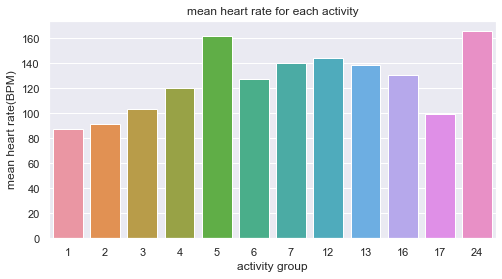

In [137]:
import seaborn as sns
from matplotlib import pyplot as plt

sns.set()
sns.barplot(x=1, y='mean heart rate', data=result[0][1])
plt.title('mean heart rate for each activity')
plt.xlabel('activity group')
plt.ylabel('mean heart rate(BPM)')

Text(0, 0.5, 'mean heart rate(BPM)')

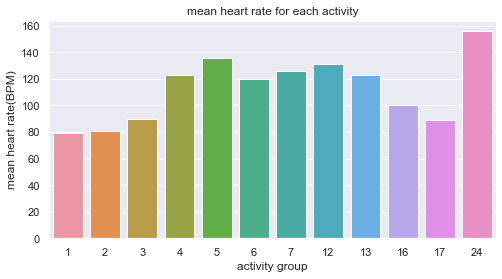

In [138]:
sns.set()
sns.barplot(x=1, y='mean heart rate', data=result[1][1])
plt.title('mean heart rate for each activity')
plt.xlabel('activity group')
plt.ylabel('mean heart rate(BPM)')

Text(0, 0.5, 'mean heart rate(BPM)')

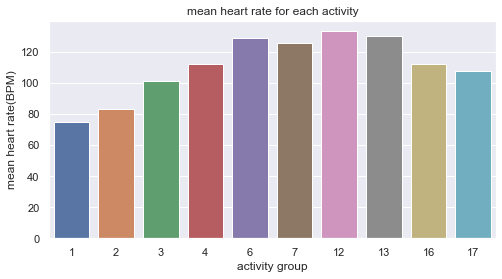

In [139]:
import seaborn as sns
from matplotlib import pyplot as plt

sns.set()
sns.barplot(x=1, y='mean heart rate', data=result[3][1])
plt.title('mean heart rate for each activity')
plt.xlabel('activity group')
plt.ylabel('mean heart rate(BPM)')

From the bar plots, very similiar results were found for each activity across all the participants. Participants with a lower resting heart rate, also ususally had a lower mean heart rate for each activity.

### Mean temperature plots

To visualise the spread of the heart rate for each activtiy, boxplots were used, the dask module was used to reduce memory issuses when plotting the data. Particpants 101,102 and 104 were plotted.

Text(0, 0.5, 'Heart Rate(BPM)')

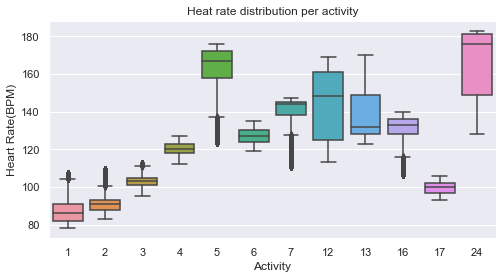

In [140]:
from dask import dataframe as dd
df_dd_x = dd.from_pandas(EDA_list[0][1], npartitions=2)
df_dd_y = dd.from_pandas(EDA_list[0][2], npartitions=2)

sns.set(rc={"figure.figsize":(8, 4)})
sns.boxplot(x=df_dd_x.compute(), y=df_dd_y.compute(), showfliers = True)
plt.title('Heat rate distribution per activity')
plt.xlabel('Activity')
plt.ylabel('Heart Rate(BPM)')

Text(0, 0.5, 'Heart Rate(BPM)')

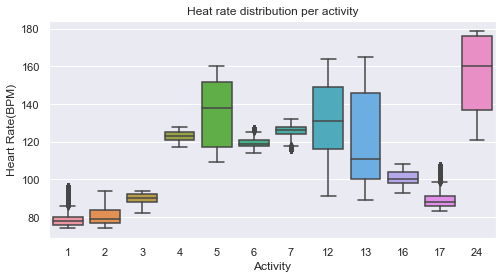

In [141]:
df_dd_x = dd.from_pandas(EDA_list[1][1], npartitions=2)
df_dd_y = dd.from_pandas(EDA_list[1][2], npartitions=2)

sns.set(rc={"figure.figsize":(8, 4)})
sns.boxplot(x=df_dd_x.compute(), y=df_dd_y.compute(), showfliers = True)
plt.title('Heat rate distribution per activity')
plt.xlabel('Activity')
plt.ylabel('Heart Rate(BPM)')

Text(0, 0.5, 'Heart Rate(BPM)')

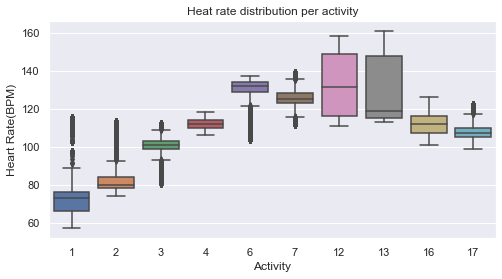

In [142]:
df_dd_x = dd.from_pandas(EDA_list[3][1], npartitions=2)
df_dd_y = dd.from_pandas(EDA_list[3][2], npartitions=2)

sns.set(rc={"figure.figsize":(8, 4)})
sns.boxplot(x=df_dd_x.compute(), y=df_dd_y.compute(), showfliers = True)
plt.title('Heat rate distribution per activity')
plt.xlabel('Activity')
plt.ylabel('Heart Rate(BPM)')

From the observed boxplot, it can be seen that activites 5,12,13 and 24 had the greatest intequartile ranges. Most activities had a negatively skewed heart rate distribution, with notable expections for activity 2 aand 13. Activities with a lower median heart rate generally had smaller interquartile ranges and a symmetrical or slight negative skew, though activites 6 and 7 did not fit this pattern.

The mean temperature for each activity was calculated for participant 101, at each location on the body were the temperature was measured. The dataframe was then converted from wide format to long format and results plotted on a bar chart for each activity.

    Activity variable      value
0          1     hand  31.289767
1          2     hand  32.307446
2          3     hand  32.938749
3          4     hand  33.201542
4          5     hand  30.685086
..       ...      ...        ...
31        12    ankle  34.889495
32        13    ankle  34.892887
33        16    ankle  34.548709
34        17    ankle  33.955503
35        24    ankle  33.141155

[36 rows x 3 columns]


Text(0, 0.5, 'Mean temp (°C)')

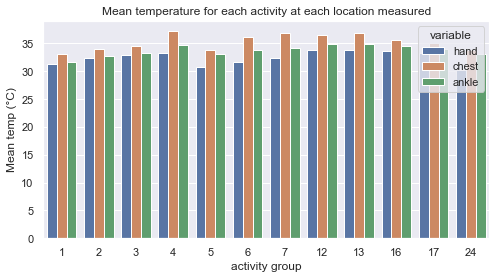

In [143]:
##mean temperature for each ativity found at each location
mean_temperature_per_activitiy = EDA_list[0].groupby(1)[3,20,37].mean().reset_index()
mean_temperature_per_activitiy.columns = ['Activity', 'hand', 'chest', 'ankle']
#dataframe melted to improve visualisation
mean_temperature_per_activitiy_melt = pd.melt(mean_temperature_per_activitiy, id_vars='Activity', value_vars=['hand', 'chest', 'ankle'])
print(mean_temperature_per_activitiy_melt)

sns.set()
sns.barplot(x='Activity', y="value",hue = "variable", data=mean_temperature_per_activitiy_melt)
plt.title('Mean temperature for each activity at each location measured')
plt.xlabel('activity group')
plt.ylabel('Mean temp (°C)')


Temperature at the chest was greatest and temperature at the hand was the smallest across all activities. This is to be expected from a biological point of view of the human body(M. Chudecka (2015) - for men especially temperatures between the ankle and hand are usually similiar.

To visualise the spread of the temperature measured for each activtiy, boxplots were used, the dask module was used to reduce memory issuse when plotting the data.

### Hand

Text(0, 0.5, 'Mean temp (°C)')

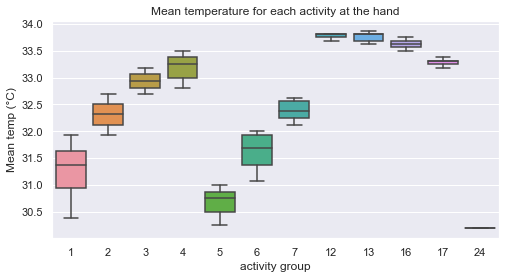

In [144]:
import dask.dataframe as dd
df_dd_x = dd.from_pandas(EDA_list[0][1], npartitions=2)
df_dd_y1 = dd.from_pandas(EDA_list[0][3], npartitions=2)
df_dd_y2 = dd.from_pandas(EDA_list[0][20], npartitions=2)
df_dd_y3 = dd.from_pandas(EDA_list[0][37], npartitions=2)

sns.set(rc={"figure.figsize":(8, 4)})
sns.boxplot(x=df_dd_x.compute(), y=df_dd_y1.compute(), showfliers = False)
plt.title('Mean temperature for each activity at the hand')
plt.xlabel('activity group')
plt.ylabel('Mean temp (°C)')

From the boxplot, it can be seen that activities with the highest temperature recorded had the lowest interquartile range. The skew for most activiteis was negatively skewed, with the exception of activity 7, which was positievely skewed. Actvity 5 had the lowest median temperature and actvity 12 had the highest median temperature.

### Chest

Text(0, 0.5, 'Mean temp (°C)')

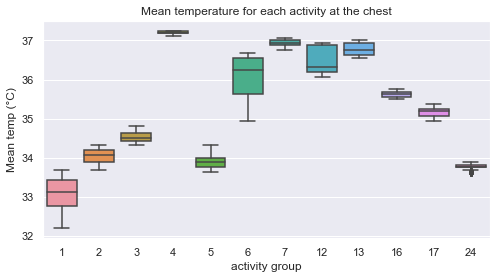

In [145]:
sns.set(rc={"figure.figsize":(8, 4)})
sns.boxplot(x=df_dd_x.compute(), y=df_dd_y2.compute(), showfliers = True)
plt.title('Mean temperature for each activity at the chest')
plt.xlabel('activity group')
plt.ylabel('Mean temp (°C)')

All median values were higher relative to the hand. Activity 4 and 7 had the highest median values, which was not the case at the hand. The skew of the data had no significant pattern. Activity 6 had the greatest range and interquartile range.

### Ankle

Text(0, 0.5, 'Mean temp (°C)')

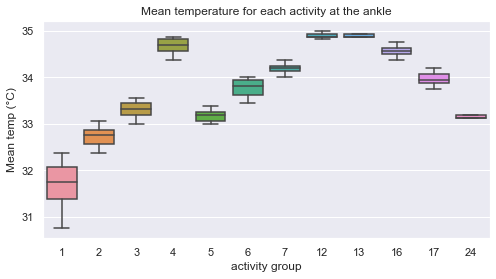

In [146]:
sns.set(rc={"figure.figsize":(8, 4)})
sns.boxplot(x=df_dd_x.compute(), y=df_dd_y3.compute(), showfliers = False)
plt.title('Mean temperature for each activity at the ankle')
plt.xlabel('activity group')
plt.ylabel('Mean temp (°C)')

All median values were lower relative to the chest. Activity 12 and 13 had the highest median values, which was not the case at the chest. The skew of the data was generally negatively skewed with the exception of activtiy 17. Activity 6 had the greatest range and interquartile range.

### Scatter plots

Scatter plots were created for particpant 101, to visualise if there was correlations between the variables. Firstly, the mean heart rate and the mean temperature at the hand were displayed, with a unique colour for each activtiy.

In [147]:
mean_hr_per_activitiy = EDA_list[0].groupby(1)[2].mean().reset_index(name='mean heart rate')
mean_temp_per_activitiy = EDA_list[0].groupby(1)[37].mean().reset_index(name='mean temp')

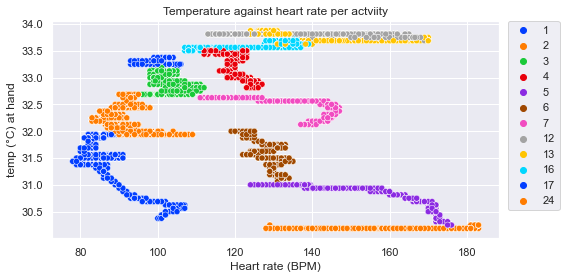

In [148]:
sns.scatterplot(data=EDA_list[0], x=2, y=3, hue=1, legend="full", palette=sns.color_palette('bright', n_colors=12))
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.title('Temperature against heart rate per actviity')
plt.xlabel('Heart rate (BPM)')
plt.ylabel('temp (°C) at hand')
plt.show()

From the plot, it can be seen there is no linear relationships, activtiy 12,13 and 16 show heavy overlap, however other activites are well seperated from each other, though in a very non uniform pattern.

a scatter plot was also created, for temperature at the chest against the heart rate.

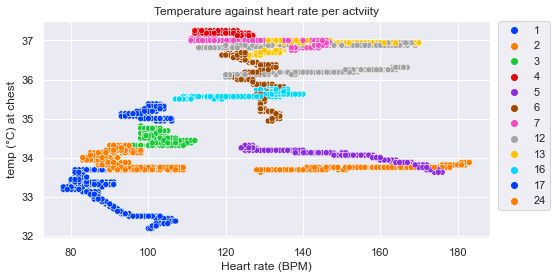

In [149]:
sns.scatterplot(data=EDA_list[0], x=2, y=20, hue=1, legend="full", palette=sns.color_palette('bright', n_colors=12))
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.title('Temperature against heart rate per actviity')
plt.xlabel('Heart rate (BPM)')
plt.ylabel('temp (°C) at chest')
plt.show()

Similiraly to the last plot, there is overlap for activites 13,7,16 and 12 - activity 6 also overlaps with this group of activities. Other activties are well seperated, though in a non uniform pattern.

A scatter plot was also created, for temperature at the ankle aganst the heart rate.

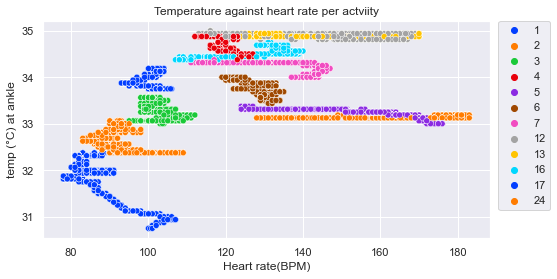

In [151]:
sns.scatterplot(data=EDA_list[0], x=2, y=37, hue=1, legend="full", palette=sns.color_palette('bright', n_colors=12))
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.title('Temperature against heart rate per actviity')
plt.xlabel('Heart rate(BPM)')
plt.ylabel('temp (°C) at ankle')
plt.show()

Relative to the hand and the chest, the overlapping of data was worst at the ankle for a number of actvitites.

A scatter plot was created to investigate any pattern between the accerlation and rotational data on a single axis.

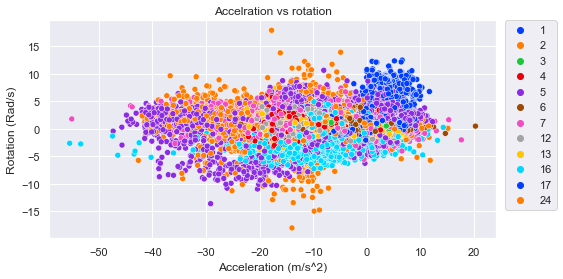

In [152]:
sns.scatterplot(data=EDA_list[0], x=4, y=21, hue=1, legend="full", palette=sns.color_palette('bright', n_colors=12))
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.title('Accelration vs rotation')
plt.xlabel('Acceleration (m/s^2)')
plt.ylabel('Rotation (Rad/s)')
plt.show()

From the plot, there was a large overlap and no linear relationships, lots of activtes have data in all 4 quadrants of the plot.

A scatter plot was created to investigate an pattern between the accerlation and magnetic data on a single axis.

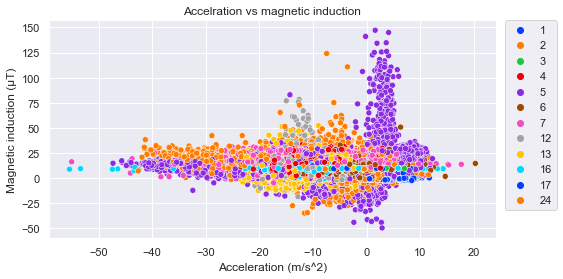

In [153]:
sns.scatterplot(data=EDA_list[0], x=4, y=38, hue=1, legend="full", palette=sns.color_palette('bright', n_colors=12))
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.title('Accelration vs magnetic induction')
plt.xlabel('Acceleration (m/s^2)')
plt.ylabel('Magnetic induction (μT)')
plt.show()

From the plot, there was a large overlap and no linear relationships, lots of activtes have data in all 4 quadrants of the plot.

A scatter plot was created to investigate any pattern between the rotation and magnetic data on a single axis.

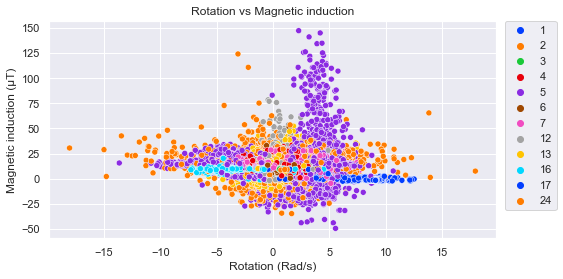

In [154]:
sns.scatterplot(data=EDA_list[0], x=21, y=38, hue=1, legend="full", palette=sns.color_palette('bright', n_colors=12))
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.title('Rotation vs Magnetic induction')
plt.xlabel('Rotation (Rad/s)')
plt.ylabel('Magnetic induction (μT)')
plt.show()

From the plot, there was a large overlap and no linear relationships, lots of activtes have data in all 4 quadrants of the plot

### Heatmap plot

To see if any of the variables had linear relationships, a heatmap of all variables was created for participant 101. Correlations between each variable were calculated using Pearsons correlation coeffiecent.

<AxesSubplot:title={'center':'Peasons Correlation for all dependant variables'}>

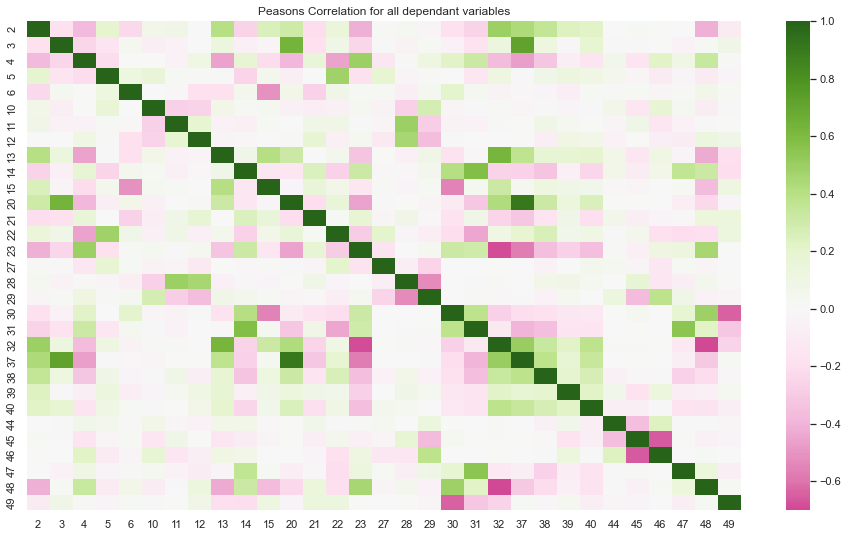

In [155]:
X = EDA_list[0].iloc[:,[2,3,4,5,6,10,11,12,13,14,15,20,21,22,23,27,28,29,30,31,32,37,38,39,40,44,45,46,47,48,49]]
plt.figure(figsize = (16,9))
plt.title('Peasons Correlation for all dependant variables')
sns.heatmap(X.corr(), cmap="PiYG", center=0) #defualt correlation paramter is pearson

From the heatmap, it can be seen the best postive linear correlation is between, the temperature at the chest and the ankle.

The heart rate at the chest and the hand were plotted in a scatter plot.

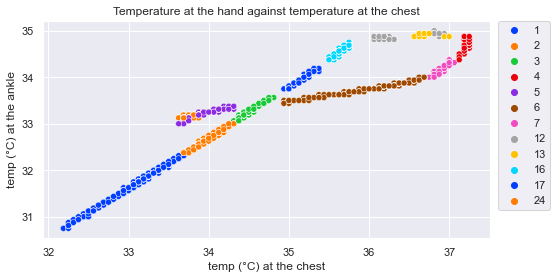

In [156]:
sns.scatterplot(data=EDA_list[0], x=20, y=37, hue=1, legend="full", palette=sns.color_palette('bright', n_colors=12))
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.title('Temperature at the hand against temperature at the chest')
plt.xlabel('temp (°C) at the chest')
plt.ylabel('temp (°C) at the ankle')
plt.show()

From the plot, it can be seen, with the exception of activties (24,5) and (12,13), there is good seperation between activies, moreover there is a strong linear correlation for some of the activities.

### Heart rate zones analysis

A functon was created to evaluate the amount of time spent in a specfc heart rate zone. Heart rate zones were split into quartiles of participant 101, With each quartile catergoised into (Very Low, Low, High and Very High ratings), a time column was added to the orginal dataframe, with each record taking place in 0.01 secoonds, this was then summed, by activtiy and into each specific heart rate zone.

              0   1      2        3          4          5        6          7  \
359526  3603.64  24  181.0  30.1875 -17.331800  11.751700  7.59226 -13.665600   
352906  3537.44  24  162.0  30.1875  -1.034390   6.126030  3.81418  -2.454840   
95245    960.83  17   96.0  33.3125  -1.644700   5.192240  4.92432  -1.610630   
44865    457.03   2   89.0  32.4375   1.028050   8.132750  5.14688   1.214760   
15127    159.65   1   86.0  31.2500   3.883800  -3.960090 -8.04770   3.864270   
...         ...  ..    ...      ...        ...        ...      ...        ...   
259441  2602.79   7  145.0  32.5000  -5.412550   6.492320  2.74669  -5.176040   
141047  1418.85  16  133.0  33.6875  -0.472713   7.333490  7.78272  -0.339593   
256128  2569.66   7  127.0  32.6250   0.783834   2.751030  1.38961   0.347703   
46513    473.51   2   91.0  32.4375  -0.459995   8.074580  5.81756  -0.408355   
291659  2924.97   6  127.0  31.8125   1.574800   0.842072  4.98723  -1.373940   

                8        9 

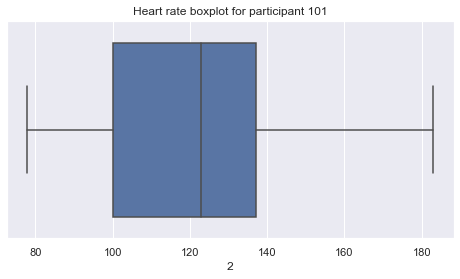

In [157]:
sns.boxplot(x=EDA_list[0][2])
plt.title('Heart rate boxplot for participant 101')
#factors a number to a specific zone
def heart_rate_zone(value):
    if value < 99:
        return "very low"
    if 99 <= value < 123:
        return "low"
    elif 123 <= value < 137:
        return "high"
    elif value >= 137:
        return "very high"
#assigns heat rate zone in  a new column to each record in th data set
EDA_list[0]["heart_rate_zone"] = EDA_list[0][2].map(heart_rate_zone)
print(EDA_list[0])
EDA_list[0]["time taken"] = 0.01
#sums time spent in each heart rate zone, per activtiy
data_mean_score = EDA_list[0].groupby([1,"heart_rate_zone"])["time taken"].sum().to_frame().reset_index()
print(data_mean_score)


The heart rate data was negatively skewed.

Results were visualised in a bar plot, to see the time spent in each heart rate zone per actvitiy.

Text(0, 0.5, 'time in heart rate zone (s)')

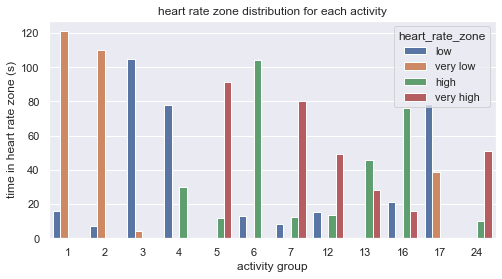

In [158]:
sns.set()
sns.barplot(x=1, y='time taken',hue = "heart_rate_zone", data=data_mean_score)
plt.title('heart rate zone distribution for each activity')
plt.xlabel('activity group')
plt.ylabel('time in heart rate zone (s)')

Activity 1 and 2 mostly take place in the very low heart rate zone, while activity 5,7,and 24 mostly take place in the very high heart rate zone.

### 3 dimensional data visulisation

To visualsie the 3 dimensional data, provided in the data set, the mean value of the 3 dimensional data was taken on each activtiy and heart rate zone, at each location on the body, for participant 101. Firstly acceleration data was analysied.

In [159]:
#mean acceleration per activity for each heart rate zone
mean_acceleration_per_activitiy =  EDA_list[0].groupby([1,"heart_rate_zone"])[4,5,6,21,22,23,38,39,40].mean().reset_index()
print(mean_acceleration_per_activitiy)

     1 heart_rate_zone         4         5         6        21        22  \
0    1             low  1.401723  5.872960  5.589947  0.493626  4.685801   
1    1        very low  4.887520  2.150109  3.501409  2.474118  1.749510   
2    2             low -1.852763  8.535910  2.408358  0.351973  8.546925   
3    2        very low -1.673246  6.891821  4.735502  0.840872  9.437000   
4    3             low -4.009534  5.971116  3.051075  0.481352  9.702987   
..  ..             ...       ...       ...       ...       ...       ...   
22  16       very high -6.537495  6.309349  2.574401 -1.937236  2.455723   
23  17             low -2.813764  5.546907  6.425155 -0.134907  9.188465   
24  17        very low -2.318406  5.465908  6.204262  0.153110  9.404212   
25  24            high -4.411837  8.226380  2.802448 -0.118395  9.297983   
26  24       very high -5.920298  8.177840  2.100080  0.226495  9.861958   

          23         38        39        40  
0   4.881897   3.195432 -5.709205 -4.0374

Using the FacetGrid function in seaborn, bar plots were made for the mean value in each dimensions for the accelaration, rotation and magnetic data, for each activity. Each row represents data from the hand, chest and ankle respectively. Accleration data was plotted first using a barplot.

<Figure size 2304x648 with 0 Axes>

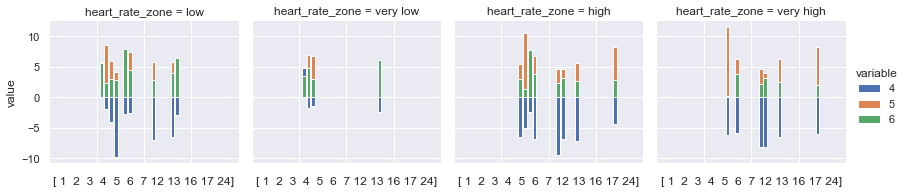

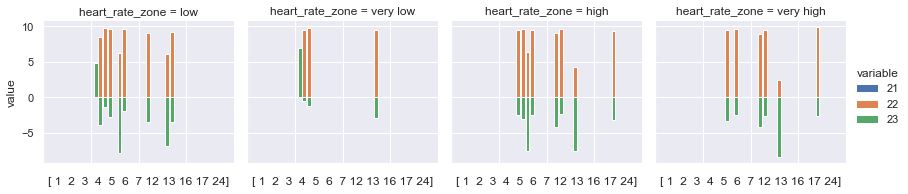

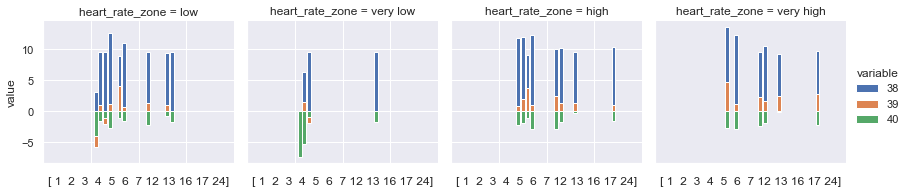

In [160]:
#converts from wide to long format
df1 = mean_acceleration_per_activitiy.melt([1,'heart_rate_zone'])
#selects columns based on locations
df1_ankle = df1[df1["variable"] < 7]
df1_chest = df1[(df1["variable"] > 20) & (df1["variable"] < 24)]
df1_wrist = df1[df1["variable"] > 37]

plt.figure(figsize = (32,9))
graph_1 = sns.FacetGrid(df1_ankle, col ="heart_rate_zone",  hue ="variable")
graph_2 = sns.FacetGrid(df1_chest, col ="heart_rate_zone",  hue ="variable")
graph_3 = sns.FacetGrid(df1_wrist, col ="heart_rate_zone",  hue ="variable")
# map the above form facetgrid with some attributes
graph_1.map(plt.bar, 1, "value").add_legend()
graph_2.map(plt.bar, 1, "value").add_legend()
graph_3.map(plt.bar, 1, "value").add_legend()

# Set the x-axis labels for the first plot
graph_1.set_xlabels(df1_ankle[1].unique())

# Set the x-axis labels for the second plot
graph_2.set_xlabels(df1_chest[1].unique())

# Set the x-axis labels for the third plot
graph_3.set_xlabels(df1_wrist[1].unique())
# Remove the tick labels for the first plot
graph_1.set_xticklabels([])

# Remove the tick labels for the second plot
graph_2.set_xticklabels([])

# Remove the tick labels for the third plot
graph_3.set_xticklabels([])
# show the object
plt.grid()
plt.show()

At the hand, the magnitude for the 3D variables was the smallest for the very low heart rate zone. Generely data was recorded in all 3 dimensions, with some exceptions, particullary in heart rate zones "low" and "very low". At the chest, data was only recorded in 2 dimensions, the magnitude of the data did not vary much. At the ankle, one dimension dominated the other dimensions across all heart rate zones - this dimensions did not record any values at the chest.

Secondly, rotational data was analysed.

In [161]:
#mean rotation per activity for each heart rate zon
mean_rotation_per_activitiy =  EDA_list[0].groupby([1,"heart_rate_zone"])[10,11,12,27,28,29,44,45,46].mean().reset_index()
print(mean_rotation_per_activitiy)

     1 heart_rate_zone        10        11        12        27        28  \
0    1             low  0.042857 -0.099244  0.012282 -0.064413 -0.057272   
1    1        very low  0.002382  0.018612 -0.004681  0.006956  0.000508   
2    2             low  0.095108  0.039977 -0.000911  0.031503 -0.025478   
3    2        very low -0.005498 -0.002919 -0.008404 -0.000095 -0.009837   
4    3             low  0.015675 -0.000302 -0.012875 -0.000712 -0.029754   
..  ..             ...       ...       ...       ...       ...       ...   
22  16       very high  0.033156 -0.032912  0.021164  0.014054 -0.046746   
23  17             low  0.013003  0.005753 -0.011575 -0.001625 -0.007413   
24  17        very low -0.030089  0.023996  0.016914  0.003421 -0.005248   
25  24            high  0.546562  0.139909 -0.145284  0.056454 -0.153831   
26  24       very high  0.422317  0.383407 -0.114690  0.004676  0.001818   

          29        44        45        46  
0   0.030721 -0.004699 -0.007768  0.069425

Rotational data was plotted using a barplot.

<Figure size 2304x648 with 0 Axes>

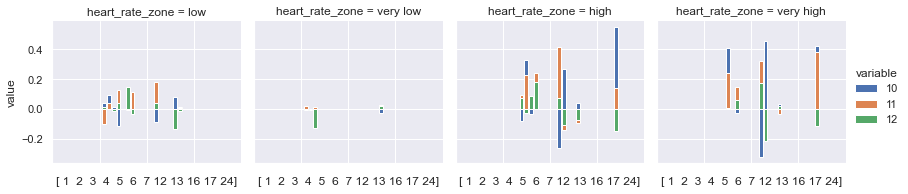

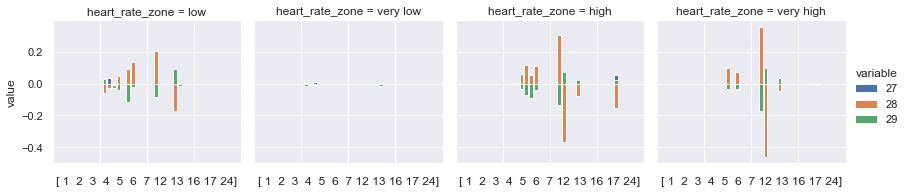

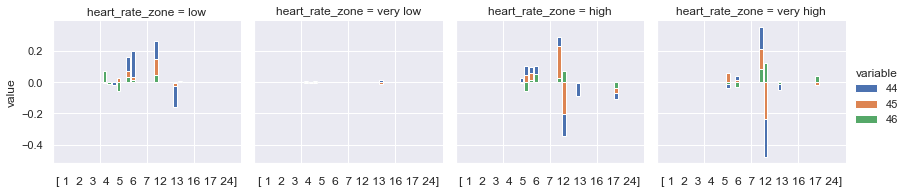

In [162]:
#melts data from wide to long format
df1 = mean_rotation_per_activitiy.melt([1,'heart_rate_zone'])
#selects data based on location
df1_ankle = df1[df1["variable"] < 13]
df1_chest = df1[(df1["variable"] > 26) & (df1["variable"] < 30)]
df1_wrist = df1[df1["variable"] > 43]

plt.figure(figsize = (32,9))
graph_1 = sns.FacetGrid(df1_ankle, col ="heart_rate_zone",  hue ="variable")
graph_2 = sns.FacetGrid(df1_chest, col ="heart_rate_zone",  hue ="variable")
graph_3 = sns.FacetGrid(df1_wrist, col ="heart_rate_zone",  hue ="variable")
# map the above form facetgrid with some attributes
graph_1.map(plt.bar, 1, "value", edgecolor ="w").add_legend()
graph_2.map(plt.bar, 1, "value", edgecolor ="w").add_legend()
graph_3.map(plt.bar, 1, "value", edgecolor ="w").add_legend()
# Set the x-axis labels for the first plot
graph_1.set_xlabels(df1_ankle[1].unique())

# Set the x-axis labels for the second plot
graph_2.set_xlabels(df1_chest[1].unique())

# Set the x-axis labels for the third plot
graph_3.set_xlabels(df1_wrist[1].unique())
# Remove the tick labels for the first plot
graph_1.set_xticklabels([])

# Remove the tick labels for the second plot
graph_2.set_xticklabels([])

# Remove the tick labels for the third plot
graph_3.set_xticklabels([])
# show the object
plt.show()

At the hand, the magnitude of the 3 dimension data was largest at the "very high" heart rate zone. At the chest, Only 2 dimensions had data recorded, with the exceptioon of activity 2 and 24. The magnitude of the data from the "very low" heart rate zone was almost zero, while the magnitude varied considerably across other heart rate zones and actvitiies. At the ankle, once again, the magnitude of the recorded data from the "very low" heart rate zone was almost zero. The magnitude of data recorded was very small for a range of activites with a few exceptions(activity 7 and 12).

Finally, magnetic data was analysed.

In [163]:
#mean magnetic induction per activity for each heart rate zone
mean_rot2_per_activitiy =  EDA_list[0].groupby([1,"heart_rate_zone"])[13,14,15,30,31,32,47,48,49].mean().reset_index()
print(mean_rot2_per_activitiy)

     1 heart_rate_zone         13         14         15         30         31  \
0    1             low -11.531225  -5.283463 -33.814428  27.553265 -11.580715   
1    1        very low  -6.241166  23.205635 -34.172510  25.689907   6.200862   
2    2             low  36.418613 -46.340830   6.682633   5.474975 -33.779608   
3    2        very low -13.725349 -25.175847 -39.661930  12.288671 -58.283014   
4    3             low  31.023020 -42.904751  -6.348893 -15.519093 -55.538538   
..  ..             ...        ...        ...        ...        ...        ...   
22  16       very high  34.690943 -18.472067  -3.834884   8.020093  -3.515864   
23  17             low -11.488263 -48.271622 -59.919092 -14.393026 -59.334282   
24  17        very low -16.001864 -45.718818 -57.773293 -16.783689 -59.085537   
25  24            high  25.616757 -47.059122 -23.049795  11.617005 -56.752625   
26  24       very high  50.745845 -36.682346  -0.711763 -33.629977 -55.980640   

           32         47   

Magnetic data was plotted using a barplot.

<Figure size 2304x648 with 0 Axes>

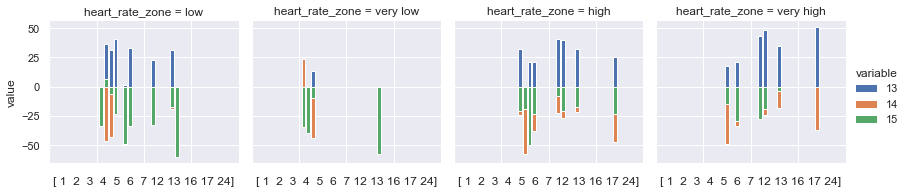

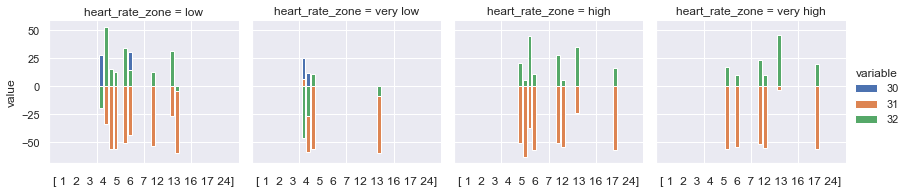

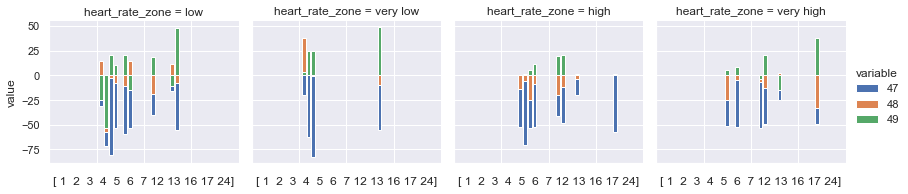

In [164]:
#converts data from wide to long format
df1 = mean_rot2_per_activitiy.melt([1,'heart_rate_zone'])
#selects data based on location
df1_ankle = df1[df1["variable"] < 16]
df1_chest = df1[(df1["variable"] > 29) & (df1["variable"] < 33)]
df1_wrist = df1[df1["variable"] > 46]

plt.figure(figsize = (32,9))
graph_1 = sns.FacetGrid(df1_ankle, col ="heart_rate_zone",  hue ="variable")
graph_2 = sns.FacetGrid(df1_chest, col ="heart_rate_zone",  hue ="variable")
graph_3 = sns.FacetGrid(df1_wrist, col ="heart_rate_zone",  hue ="variable")
# map the above form facetgrid with some attributes
graph_1.map(plt.bar, 1, "value", edgecolor ="w").add_legend()
graph_2.map(plt.bar, 1, "value", edgecolor ="w").add_legend()
graph_3.map(plt.bar, 1, "value", edgecolor ="w").add_legend()
# Set the x-axis labels for the first plot
graph_1.set_xlabels(df1_ankle[1].unique())

# Set the x-axis labels for the second plot
graph_2.set_xlabels(df1_chest[1].unique())

# Set the x-axis labels for the third plot
graph_3.set_xlabels(df1_wrist[1].unique())
# Remove the tick labels for the first plot
graph_1.set_xticklabels([])

# Remove the tick labels for the second plot
graph_2.set_xticklabels([])

# Remove the tick labels for the third plot
graph_3.set_xticklabels([])
# show the object
plt.show()

At the hand, generally the number of dimensions increased with incresing heart rate. In the "very low" and "low" heart rate, records were ony found in 2 dimensions for most activites. The opposite was true at the chest where only 2 dimensions were recorded at "high" and very high" heart rates, while other zones had more mixed dimensional records. At the ankle, the magnitude  of actvities at the "very low" heart rate zone generally was the greatest.

## Hypothesis testing:
A function was designed which took an activity, paricipant and testing and training data and returned the result of the comparisons of two means hypothesis test. A null and alternative hypothesis were set and a test statistic calculated, by taking away the mean and dividing by the standard error for the data within the dataset, the test statistic was converted to a p value using the stats package (cumulative normal distribution), to verify if the test statistic fell in the critical region(p < 0.05). A Z-test was carried out, since the samples were greater than 30.

In [165]:
from scipy import stats
from statistics import variance
#h0 mean heart rate value for EDA dat for specific activity = mean heart rate value for testing data for a specific activity
#h1 mean heart rate value for EDA dat for specific activity != mean heart rate value for testing data for a specific activity
#function takes 4 arguments, two dataframes, an activtiy and a participant number
def mean_value_hypothesis_test(df_EDA,df_TEST,activity,participent):
    activity_rating_means = []
    activity_rating_std = []
    activity_rating_count = []
    mean_value = []
    x = []
    mu = []
    s = []
    n = []
    z = []
    p = []
    activity_rating_means=df_TEST[participent].groupby(1)[2].mean()
    activity_rating_std=df_TEST[participent].groupby(1)[2].std()
    activity_rating_count=df_TEST[participent].groupby(1)[2].count()
    mean_value = df_EDA[participent][df_EDA[participent][1] == activity][2].mean()
    std_value = df_EDA[participent][df_EDA[participent][1] == activity][2].std()
    print("mean value for heart rate for activity " + str(activity) + ":",mean_value)
    x = activity_rating_means[activity]
    mu = mean_value
    s = std_value
    n = df_EDA[participent][df_EDA[participent][1] == activity].shape[1]
    z =  (x - mu)/(s / np.sqrt(n))
    p = 1 - stats.norm.cdf(z)
    print ("p-value: " + str(p))

mean_value_hypothesis_test(EDA_list,TEST_list,5,0) 
mean_value_hypothesis_test(EDA_list,TEST_list,1,0)
mean_value_hypothesis_test(EDA_list,TEST_list,5,1)

mean value for heart rate for activity 5: 161.45651229162613
p-value: 0.5356293000384024
mean value for heart rate for activity 1: 87.47951573592596
p-value: 0.45842008317400296
mean value for heart rate for activity 5: 135.5162714348272
p-value: 0.4095734027742097


From the results of the hypothesis tests, none of the test statistics fell in the critial region, and hence we can accept the null hypothesis, that the mean heart rate is the same for each activity in the training and testing datasets.

# Machine learning model

### Total physical activity

Firstly, to determine the amount of physical activity completed, numerical intergration was used, using the trapezium rule, for each activity with time as the x variable and heart rate as the y variable using the whole dataset to get a complete picture. The units of the amount of physical activty completed would be (beats per minute per second)(Beats/(min)*1/(sec)).
The sum of all actvitiies would equate to the total amount of physical activtiy. This calculated variable is not euivalent to energy used per activity, though would have a high positive correlation - espcially when heart rate is closer to its resting heart rate(J.A.LeBlanc (1957)). 

In [166]:
print(allLines_2[0])
#find unique activties
values = allLines_2[0][1].unique()
#Use trapezium rule numerically integrate.
for i in values:
    trap = allLines_2[0][allLines_2[0][1] == i]
    result = np.trapz(y = trap[2], x=trap[0])
    print(i, result)
# sum

             0   1      2        3        4        5        6        7   \
2928      37.66   1  100.0  30.3750  2.21530  8.27915  5.58753  2.24689   
2929      37.67   1  100.0  30.3750  2.29196  7.67288  5.74467  2.27373   
2930      37.68   1  100.0  30.3750  2.29090  7.14240  5.82342  2.26966   
2931      37.69   1  100.0  30.3750  2.21800  7.14365  5.89930  2.22177   
2932      37.70   1  100.0  30.3750  2.30106  7.25857  6.09259  2.20720   
...         ...  ..    ...      ...      ...      ...      ...      ...   
361795  3626.33  24  183.0  30.1875  2.51550  7.02650  5.78869  2.44962   
361796  3626.34  24  183.0  30.1875  2.50643  6.30465  5.67552  2.53332   
361797  3626.35  24  183.0  30.1875  2.54102  5.84908  5.67758  2.55875   
361798  3626.36  24  183.0  30.1875  2.65866  5.88715  5.79468  2.57228   
361799  3626.37  24  183.0  30.1875  2.51044  6.11629  5.83017  2.58812   

             8        9   ...        44        45        46       47       48  \
2928    8.55387  5

For particpant 101, completing activity 12 used the most amount of energy, while completing activtiy 2 required the least amount of energy.

### Kmean clustering analysis

To determne the type of activity taking place, K-means Clustering was used with a known number of clusters. Firstly, all data was normalised to have a mean of zero and a standard deviation of 1 using modules from the sklearn.preprocessing, then principle component analysis was used to reduce the multi dimensional data to two dimensions. Data was used from partipant 101.

In [167]:

from sklearn.preprocessing import MinMaxScaler, StandardScaler


X = EDA_list[0].iloc[:,[2,3,4,5,6,10,11,12,13,14,15,20,21,22,23,27,28,29,30,31,32,37,38,39,40,44,45,46,47,48,49]]
# MinMaxScaler scales the data to the range [0, 1]
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

# StandardScaler scales the data to have zero mean and unit variance
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

from sklearn.decomposition import PCA

# Load the dataset
X = X_normalized

# Create the PCA model
pca = PCA(n_components=2)

# Fit the model to the data and transform the data to the lower-dimensional space
X_reduced = pca.fit_transform(X)
print(X_reduced)
print(X_reduced.shape)


[[ 2.14641227  0.84166348]
 [ 0.26292838 -1.48669448]
 [-0.07198352  1.15272795]
 ...
 [ 1.31957377  1.32790885]
 [-2.2569274   0.90475106]
 [ 1.05812607  0.79776206]]
(123604, 2)


The reduced dimensions were plotted onto a scatter plot to visualise the dataset.

[ 2.14641227  0.26292838 -0.07198352 ...  1.31957377 -2.2569274
  1.05812607]


Text(0.5, 1.0, 'Scatter plot for Normalised reduce data across all dependant variables')

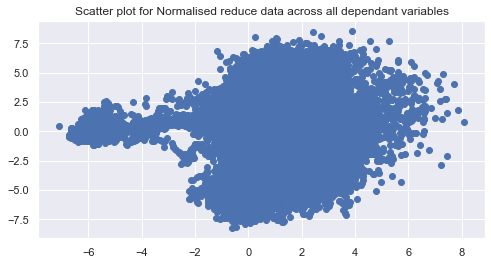

In [168]:
print(X_reduced[:,0]) 
plt.scatter(X_reduced[:,0],X_reduced[:,1])
plt.title('Scatter plot for Normalised reduce data across all dependant variables')

The scatter plot showed no clear patterns, the density is greatest at the centre, and lower at the negative x axis

With the reduce dataset, K means clustering analysis was completed, to invesitgate how the algorithm would assign data points. 12 clusters were used, since that was the number of activtiies taken up by participant 101 in the protocol of the study. The cluster function was used from the sklearn module. The assigned values were plotted on a scatter plot to visualise how the algorithm had assinged values to the data.

[[ 2.14641227  0.84166348]
 [ 0.26292838 -1.48669448]
 [-0.07198352  1.15272795]
 ...
 [ 1.31957377  1.32790885]
 [-2.2569274   0.90475106]
 [ 1.05812607  0.79776206]]


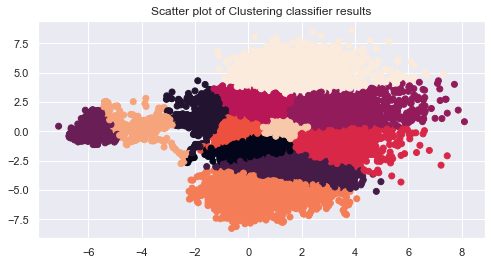

In [169]:
random.seed(22)
# Load the 2D data
X = X_reduced
print(X)
from sklearn import cluster
from collections import defaultdict
K=12 # specify number of clusters
cl_K12=cluster.KMeans(init='random',n_clusters=K, max_iter=300,algorithm = "elkan", n_init = 10)
cl_K12.fit(X) 
y_pred = cl_K12.predict(X)  


# Visualize the clusters
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title('Scatter plot of Clustering classifier results')
plt.show()

The plot shows how the activities were assigned by the k-means algorithm.

It would be helpful to compare the scatter plot of the ground truth, hence scatter plot for all activites was plotted, using the ground truth values as the key for the legend.

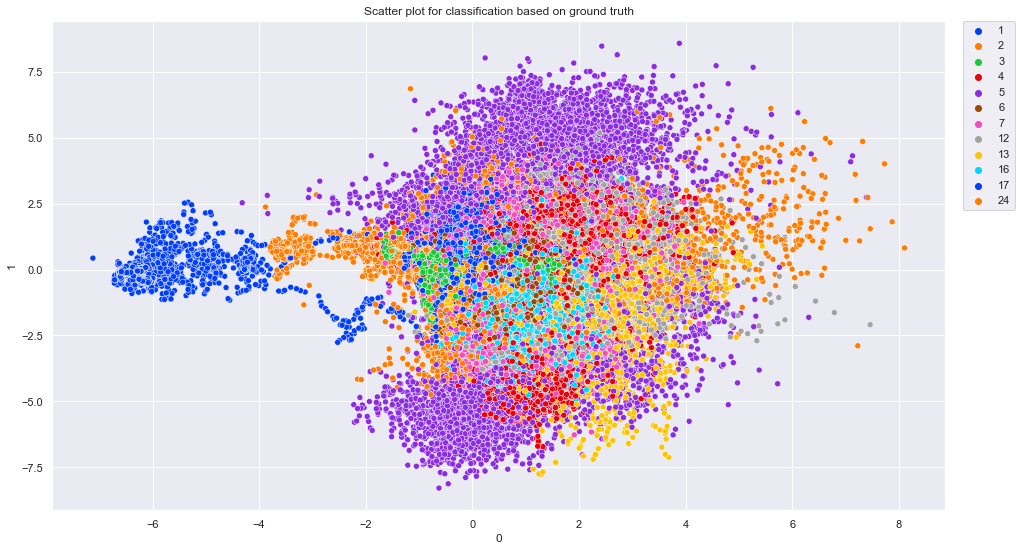

In [170]:
# Visualize the clusters
X = pd.DataFrame(X)
Y = EDA_list[0].iloc[:,1].to_frame().reset_index()
Y.columns =["index","Ground Truth"]
X["ground Truth"] = Y["Ground Truth"]
plt.figure(figsize = (16,9))
sns.scatterplot(data=X, x=0, y=1, hue="ground Truth", legend="full", palette=sns.color_palette('bright', n_colors=12))
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.title('Scatter plot for classification based on ground truth')
plt.show()

The ground truth shows that, the classifier did not do a good job of classifying aactivities. For this analysis, the scatter plot has many activities with no linear or density correlation, moreover, a number of activties overlap each other. 

From the sklean module, I inmported a range of functions to give a numeric score to the classifer, relative to the ground truth.

In [171]:
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score, homogeneity_completeness_v_measure
y_true = X["ground Truth"]
ari = adjusted_rand_score(y_true, y_pred)
print(f'Adjusted Rand Index: {ari:.3f}')
h, c, v = homogeneity_completeness_v_measure(y_true, y_pred)
print(f'Homogeneity: {h:.3f}')
print(f'Completeness: {c:.3f}')
print(f'V-measure: {v:.3f}')


Adjusted Rand Index: 0.204
Homogeneity: 0.332
Completeness: 0.349
V-measure: 0.340


a score of 1 is a perfect score while a score of 0 is the lowest score. From a variety of metrics, the score is very poor.

I calculated the standard deviation for each activity from the ground truth, based on the normalised reduced dimensional data.

In [172]:
pd.set_option('display.max_rows', 13)
print(X)
std = X.groupby('ground Truth').std()
std["total"] = np.sqrt(std[0]**2 + std[1]**2)
std.sort_values(by='total', ascending=False)

               0         1  ground Truth
0       2.146412  0.841663            24
1       0.262928 -1.486694            24
2      -0.071984  1.152728            17
3      -2.288844  0.950142             2
4      -4.276351  0.061450             1
...          ...       ...           ...
123599  2.048170 -3.601311             7
123600  1.309554  0.592301            16
123601  1.319574  1.327909             7
123602 -2.256927  0.904751             2
123603  1.058126  0.797762             6

[123604 rows x 3 columns]


,0,1,total
ground Truth,,,
5,1.277347,3.893545,4.097720
4,0.772052,2.151502,2.285832
24,1.543684,1.632630,2.246873
7,0.992823,1.794231,2.050600
12,0.982109,1.583602,1.863420
13,1.111765,1.422827,1.805673
1,1.515164,0.358065,1.556898
2,1.289318,0.655841,1.446537
16,0.571215,1.210937,1.338900


Clustering activities, 17,3,6,16,2,1 should be easier to classify

Clustering activities  5,4,24,7,12,13 should be harder to classify

From this analysis, it suggests that activites 17,3,6,16,2 and 1 may be easier to cluster for the kmeans clustering algortihm.

The same processes of preprocessing the data was completed, both normalisation and principle component anaysis were used on only 6 activities of particpant 101, to see how well the clustering algorithm performed.

In [173]:

easy = [17,3,6,16,2,1]

easy_activity = EDA_list[0].loc[EDA_list[0][1].isin([17,3,6,16,2,1])]
print(easy_activity)
X = easy_activity.iloc[:,[2,3,4,5,6,10,11,12,13,14,15,20,21,22,23,27,28,29,30,31,32,37,38,39,40,44,45,46,47,48,49]]
# MinMaxScaler scales the data to the range [0, 1]
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

# StandardScaler scales the data to have zero mean and unit variance
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Load the dataset
X = X_normalized

# Create the PCA model
pca = PCA(n_components=2)

# Fit the model to the data and transform the data to the lower-dimensional space
X_reduced = pca.fit_transform(X)
print(X_reduced)
print(X_reduced.shape)

              0   1      2        3          4         5          6  \
95245    960.83  17   96.0  33.3125  -1.644700  5.192240   4.924320   
44865    457.03   2   89.0  32.4375   1.028050  8.132750   5.146880   
15127    159.65   1   86.0  31.2500   3.883800 -3.960090  -8.047700   
284542  2853.80   6  124.0  32.0000  -2.953070  6.020890   7.326640   
89413    902.51  17   99.0  33.2500  -6.894360  9.316440  11.721000   
...         ...  ..    ...      ...        ...       ...        ...   
120677  1215.15  16  111.0  33.5625 -16.467100  2.036400  -0.328901   
118970  1198.08  16  108.0  33.5000  -1.489120  7.398550   5.688960   
141047  1418.85  16  133.0  33.6875  -0.472713  7.333490   7.782720   
46513    473.51   2   91.0  32.4375  -0.459995  8.074580   5.817560   
291659  2924.97   6  127.0  31.8125   1.574800  0.842072   4.987230   

                7         8        9  ...        46        47        48  \
95245   -1.610630  5.289210  5.55601  ...  0.007550 -46.55440  -9.46581 

The reduced dimensions were plotted onto a scatter plot to visualise the dataset.

Text(0.5, 1.0, 'Scatter plot for Normalised reduce data across all dependant variables, for 6 actvities')

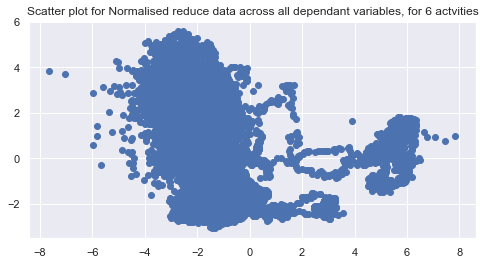

In [174]:
plt.scatter(X_reduced[:,0],X_reduced[:,1])
plt.title('Scatter plot for Normalised reduce data across all dependant variables, for 6 actvities')

The scatter plot forms 2 distinct clusters, though greater density is found on the negative x axis.

6 clusters were used applying the same k-means clustering algortihm as before. The results were visulised on a scatter plot.

[[-0.95497124 -2.37079778]
 [ 1.06230073 -2.44958801]
 [ 4.75544502  0.29458728]
 ...
 [-2.73019505  0.55062692]
 [ 0.99588431 -2.23117633]
 [-2.28996798  0.08700969]]


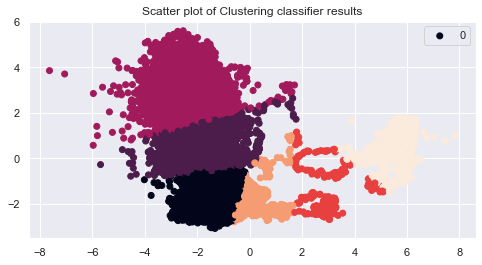

In [175]:
random.seed(73)
# Load the 2D data
X = X_reduced
print(X)
K=6 # specify number of clusters
cl_K12=cluster.KMeans(init='random',n_clusters=K, max_iter=300, n_init = 20)
cl_K12.fit(X) 
y_pred = cl_K12.predict(X)  


#Visualize the clusters
plt.scatter(X[:, 0], X[:, 1], c=y_pred, label=y_pred)
plt.legend(y_pred)
plt.title('Scatter plot of Clustering classifier results')
plt.show()

I compared the scatter plot results with the ground truth, plotting a scatter plot of the grond truth.

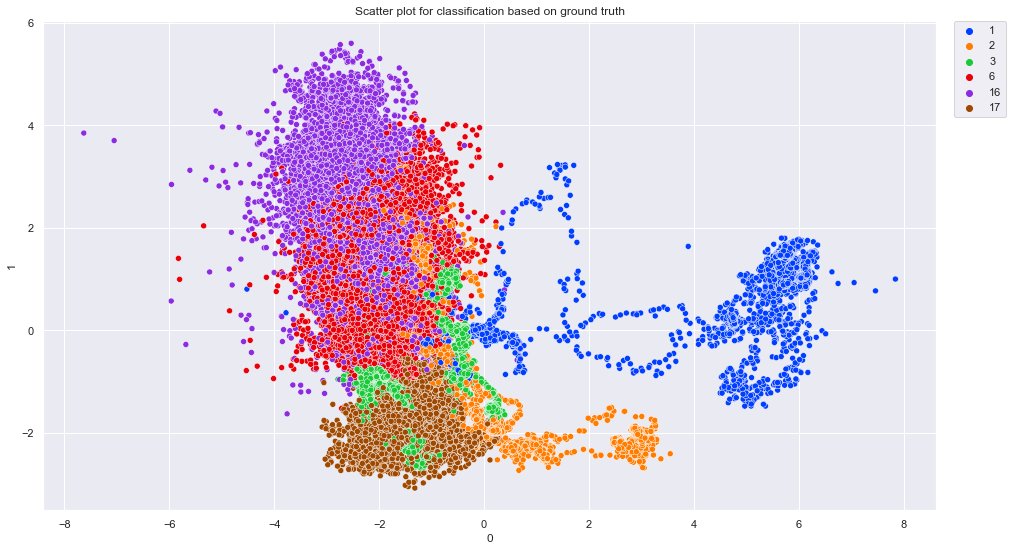

In [176]:
X = pd.DataFrame(X)
Y = easy_activity.iloc[:,1].to_frame().reset_index()
Y.columns =["index","Ground Truth"]
X["ground Truth"] = Y["Ground Truth"]
plt.figure(figsize = (16,9))
sns.scatterplot(data=X, x=0, y=1, hue="ground Truth", legend="full", palette=sns.color_palette('bright', n_colors=6))
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.title('Scatter plot for classification based on ground truth')
plt.show()

From the two plot, it's easier to see better results than before, however the ground truth still has a lot of overlap.

A range of metrics were calculated to numerically give a score to the extent to which the cluster algortihm had imporved.

In [177]:
# predict the cluster labels for the data
y_true = X["ground Truth"]
# calculate the ARI
print(y_true)
print(y_pred)
ari = adjusted_rand_score(y_true, y_pred)
print(f'Adjusted Rand Index: {ari:.3f}')
h, c, v = homogeneity_completeness_v_measure(y_true, y_pred)
print(f'Homogeneity: {h:.3f}')
print(f'Completeness: {c:.3f}')
print(f'V-measure: {v:.3f}')


0        17
1         2
2         1
3         6
4        17
         ..
71114    16
71115    16
71116    16
71117     2
71118     6
Name: ground Truth, Length: 71119, dtype: int64
[0 4 5 ... 1 4 1]
Adjusted Rand Index: 0.519
Homogeneity: 0.597
Completeness: 0.639
V-measure: 0.617


There has been an improvement in the algorithm, nevertheless the scores are still well below the optimal value of 1.

From the exploratory data analysis, the heat map suggested the variables with the best linear correlation were the temperature records at the heart and on the hand. Hence it seemed reasonable to try the kmeans clustering algorithm on these variables. Hence a data set was created with these dependant variables normalised. Since there was only 2 dimensions in the data set, the need to dimensionally reduce the dataset was redundant.

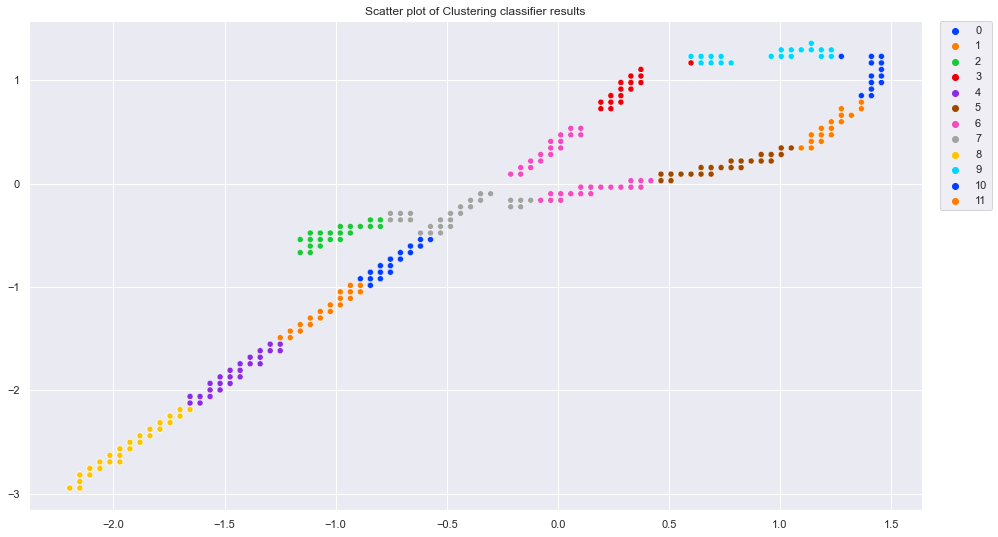

In [178]:

random.seed(4)
X = EDA_list[0].iloc[:,[20,37]]
# MinMaxScaler scales the data to the range [0, 1]
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

# StandardScaler scales the data to have zero mean and unit variance
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

K=12 # specify number of clusters
cl_K12=cluster.KMeans(init='random',n_clusters=K, max_iter=300, n_init = 20)
cl_K12.fit(X_normalized) 
y_pred = cl_K12.predict(X_normalized)  

plt.figure(figsize = (16,9))
sns.scatterplot(x = X_normalized[:, 0], y = X_normalized[:, 1], hue=y_pred, legend="full", palette=sns.color_palette('bright', n_colors=12))
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.title('Scatter plot of Clustering classifier results')
plt.show()

I compared the scatter plot results with the ground truth, plotting a scatter plot of the grond truth.

         index       20       37
0       359526  33.8125  33.1875
1       352906  33.7500  33.1250
2        95245  35.1250  33.9375
3        44865  34.1250  32.8125
4        15127  33.0625  31.6875
...        ...      ...      ...
123599  259441  37.0000  34.2500
123600  141047  35.7500  34.6875
123601  256128  37.0000  34.3125
123602   46513  34.1875  32.8750
123603  291659  36.4375  33.8750

[123604 rows x 3 columns]
0         24
1         24
2         17
3          2
4          1
          ..
123599     7
123600    16
123601     7
123602     2
123603     6
Name: Ground Truth, Length: 123604, dtype: int64
         index       20       37  ground Truth
0       359526  33.8125  33.1875            24
1       352906  33.7500  33.1250            24
2        95245  35.1250  33.9375            17
3        44865  34.1250  32.8125             2
4        15127  33.0625  31.6875             1
...        ...      ...      ...           ...
123599  259441  37.0000  34.2500             7
123600  1

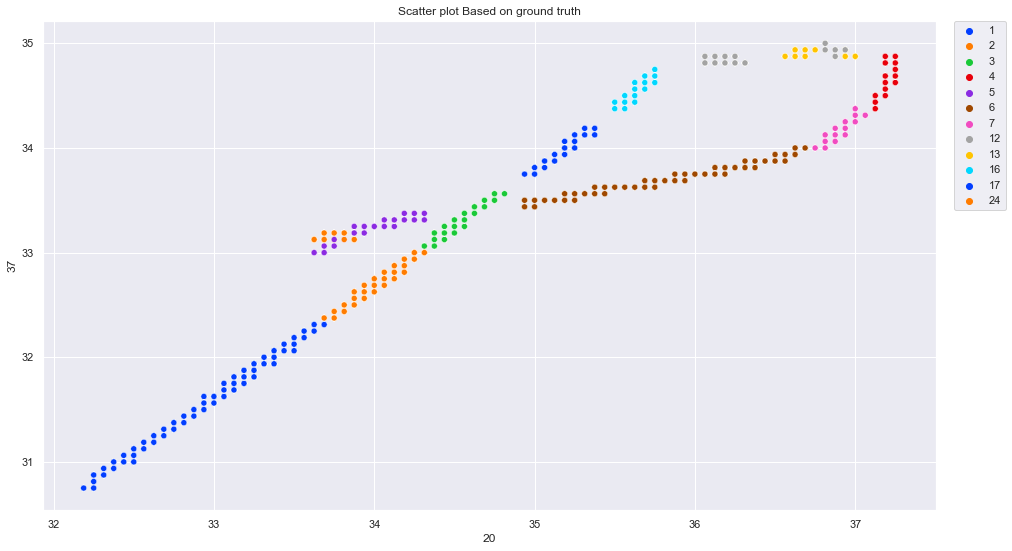

In [179]:
X = pd.DataFrame(X).reset_index()
print(X)
Y = EDA_list[0].iloc[:,1].to_frame().reset_index()
Y.columns =["index","Ground Truth"]
print(Y["Ground Truth"])
X["ground Truth"] = Y["Ground Truth"]
print(X)
plt.figure(figsize = (16,9))
sns.scatterplot(data=X, x=20, y=37, hue="ground Truth", legend="full", palette=sns.color_palette('bright', n_colors=12))
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.title('Scatter plot Based on ground truth')
plt.show()

From the ground truth, with the exception of activity 5,2 and activity 12 and 13, there is no overlapping from the activities

A range of metrics were calculated to numerically give a score to the extent to which the clustering algorithm had improved.

In [180]:
X = pd.DataFrame(X_normalized)
Y = EDA_list[0].iloc[:,1].to_frame().reset_index()
Y.columns =["index","Ground Truth"]
X["ground Truth"] = Y["Ground Truth"]
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score, homogeneity_completeness_v_measure
y_true = X["ground Truth"]
ari = adjusted_rand_score(y_true, y_pred)
print(f'Adjusted Rand Index: {ari:.3f}')
h, c, v = homogeneity_completeness_v_measure(y_true, y_pred)
print(f'Homogeneity: {h:.3f}')
print(f'Completeness: {c:.3f}')
print(f'V-measure: {v:.3f}')


Adjusted Rand Index: 0.690
Homogeneity: 0.832
Completeness: 0.841
V-measure: 0.837


The metrics show a signifcant improvment, with the homogeneity, completeness and  V-measure all greater than 0.8. This suggested this is a better model for trying to predict the activiy type, than using all the data collected.

### Optional data analysis
#### Verification of Kmeans clustering model

Optional data was also provided in the data set, with performed actvities outside the given protocol. This data was downloaded into a dataframe, and checked to see how well it performed on a kmeans clustering algorithm, using data from the temperature at the hand, and the temperature at the chest.

Data was read into the jupyter notebook environment, as done previously

In [181]:
CWD = os.getcwd()
file_path = CWD + '\\Dataset\\Optional\\' 
path = file_path
allLines_3 = []
fileList = os.listdir(path)
#select and text fles in working directory
for i in fileList:
    if i.endswith(".dat"):
        file = pd.read_csv(os.path.join(file_path + i), sep='\s+|\s+', names = range(0,53),engine='python', header = None)
        allLines_3.append(file)

The dataset was printed to see how the rows and columns were arranged

In [182]:
print(allLines_3[0])

         0      1        2        3        4        5        6        7   \
10.03     0  105.0  33.3125  1.99964  6.94837  5.08845  2.62244  7.73457   
10.04     0    NaN  33.3125  1.80990  6.45729  5.16424  2.19725  6.93762   
10.05     0    NaN  33.3125  1.82756  5.93151  5.78208  2.01408  6.28989   
10.06     0    NaN  33.3125  1.75760  5.78202  5.97397  1.83344  5.83858   
10.07     0    NaN  33.3125  1.50670  6.20407  6.27669  1.71564  5.82465   
...      ..    ...      ...      ...      ...      ...      ...      ...   
3203.50   0    NaN  34.5625  2.18107  8.34630  4.58612  2.40197  8.43084   
3203.51   0    NaN  34.5625  2.36012  8.45598  4.28053  2.43224  8.47590   
3203.52   0    NaN  34.5625  2.21003  8.41954  4.31689  2.43261  8.44577   
3203.53   0    NaN  34.5625  2.17197  8.38190  4.31645  2.46212  8.40022   
3203.54   0    NaN  34.5625  2.13285  8.19249  4.31650  2.41527  8.32493   

              8         9   ...        43        44        45       46  \
10.03    4.64

To match the frequnecy of the heart rate data and IMU data, a function was applied to fill in data with averages of the recorded data.

In [183]:
for i in range(0,len(allLines_3)):
    mask = np.isnan(allLines_3[i][1])
    allLines_3[i][1][mask] = np.interp(np.flatnonzero(mask), np.flatnonzero(~mask), allLines_3[i][1][~mask])
    allLines_3[i] = allLines_3[i][allLines_3[i][0] != 0]

    allLines_3[i] = allLines_3[i].dropna()

For the first participant(participant 101), the unique activties were found.

In [184]:
print(allLines_3[0][0].unique())

[11  9 19 18]


A data set was created with the temperature at the hand and the chest - with the values normalised. Since there was only 2 dimensions in the data set, the need to dimensionally reduce the dataset was redundant.

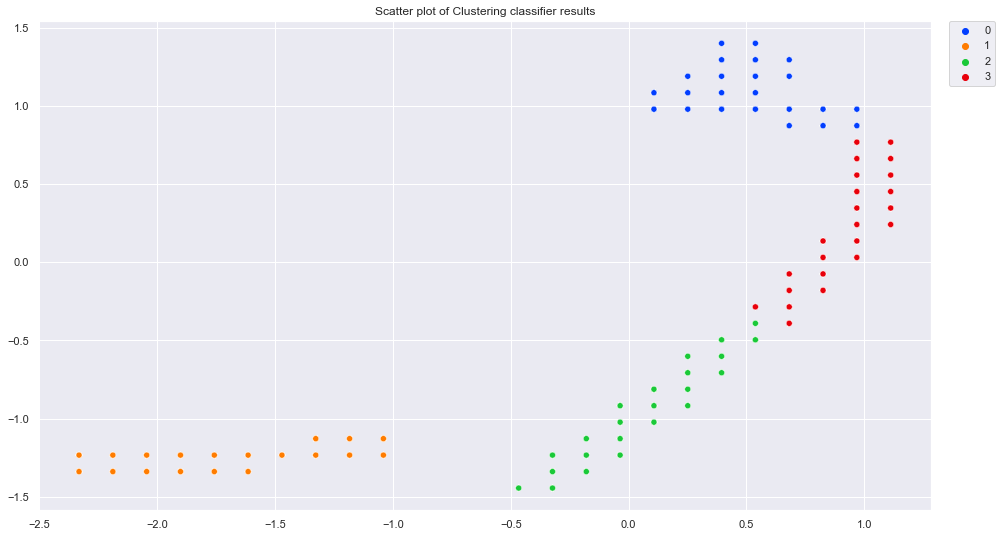

In [186]:
random.seed(24)
X = allLines_3[0].iloc[:,[19,36]]
# MinMaxScaler scales the data to the range [0, 1]
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

# StandardScaler scales the data to have zero mean and unit variance
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

K=4 # specify number of clusters
import warnings
warnings.filterwarnings('ignore')
cl_K12=cluster.KMeans(init='random',n_clusters=K, max_iter=300, n_init = 20)
cl_K12.fit(X_normalized) 
y_pred = cl_K12.predict(X_normalized)  
plt.figure(figsize = (16,9))
sns.scatterplot(x = X_normalized[:, 0], y = X_normalized[:, 1], hue=y_pred, legend="full", palette=sns.color_palette('bright', n_colors=4))
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.title('Scatter plot of Clustering classifier results')
plt.show()

From the scatter plot, the shap of the data is not linear. To check how accurate the classifer was, it was compared to the ground truth. 

          index       19       36
0        199.39  36.0625  34.9375
1        199.40  36.0625  34.9375
2        199.41  36.0625  34.9375
3        199.42  36.0625  34.9375
4        199.43  36.0625  34.9375
...         ...      ...      ...
218916  3143.37  37.2500  36.5000
218917  3143.38  37.2500  36.5000
218918  3143.39  37.2500  36.5000
218919  3143.40  37.2500  36.5000
218920  3143.41  37.2500  36.5000

[218921 rows x 3 columns]
          index       19       36  ground Truth
0        199.39  36.0625  34.9375            11
1        199.40  36.0625  34.9375            11
2        199.41  36.0625  34.9375            11
3        199.42  36.0625  34.9375            11
4        199.43  36.0625  34.9375            11
...         ...      ...      ...           ...
218916  3143.37  37.2500  36.5000            18
218917  3143.38  37.2500  36.5000            18
218918  3143.39  37.2500  36.5000            18
218919  3143.40  37.2500  36.5000            18
218920  3143.41  37.2500  36.5000    

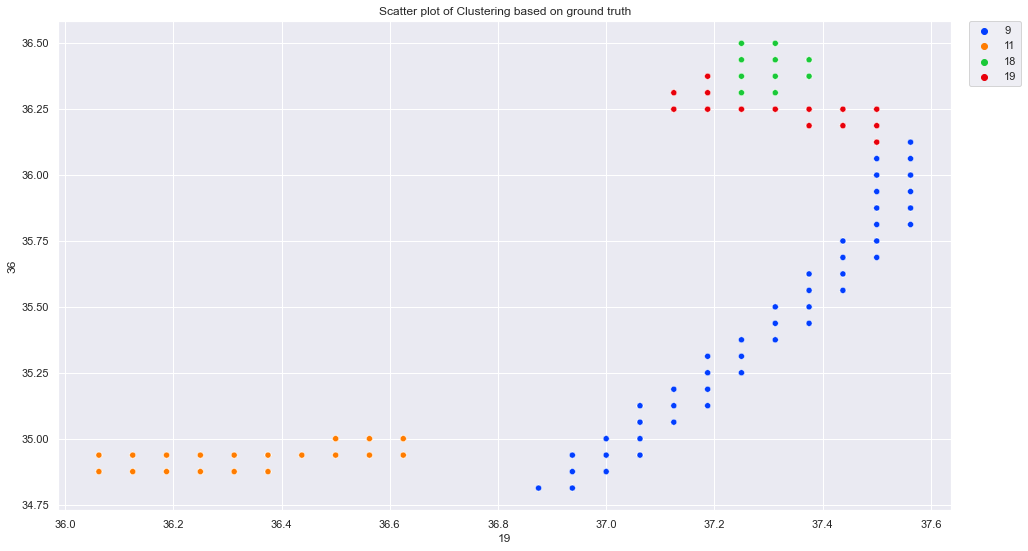

In [187]:
X = pd.DataFrame(X).reset_index()
print(X)
Y = allLines_3[0].iloc[:,0].to_frame().reset_index()
Y.columns =["index","Ground Truth"]
X["ground Truth"] = Y["Ground Truth"]
print(X)
plt.figure(figsize = (16,9))
sns.scatterplot(data=X, x=19, y=36, hue="ground Truth", legend="full", palette=sns.color_palette('bright', n_colors=4))
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.title('Scatter plot of Clustering based on ground truth')
plt.show()

Activities 18 and 19 may be challenging for the classifier to classify, nonethelss other classifcation results of the ground truth look similiar to the kmeans classifer.

A range of metrics were calculated to numerically give a score to the extent to which the clustering algorithm had improved.

In [188]:
X = pd.DataFrame(X_normalized)
Y = allLines_3[0].iloc[:,0].to_frame().reset_index()
Y.columns =["index","Ground Truth"]
X["ground Truth"] = Y["Ground Truth"]
y_true = X["ground Truth"]
ari = adjusted_rand_score(y_true, y_pred)
print(f'Adjusted Rand Index: {ari:.3f}')
h, c, v = homogeneity_completeness_v_measure(y_true, y_pred)
print(f'Homogeneity: {h:.3f}')
print(f'Completeness: {c:.3f}')
print(f'V-measure: {v:.3f}')

Adjusted Rand Index: 0.669
Homogeneity: 0.816
Completeness: 0.800
V-measure: 0.808


The classification metrics are very similar in value to the original(protocol) dataset, suggesting that the classification was reasonably successful at classifing these different activities.

# Summary
The purpose of this analysis was to investigate if it was possible to ascertain which activity was taking place, from the measured data, as well as the total amount of energy needed to complete the varirous activities.

Exploratory data analyis was carried out on 50% of the data. The data was summaried into summary statisitcs and the mean heart rate was found for each activity, as well as the distribution of heart rates for each activity. similar anaysis was done for the temperature data, at each location where the temperature was measured. Scatter plots were plotted for a range of variables, including temperature against heart rate, and how acceleration, rotation and magnetic induction interacted with each other. A heat map was produced, showing the extent to which linear correations between each variables arose, using pearsons correlation coeffiecnt. Heart rates were catergorised into different zones based on the distribution of the heart rates across all activities and the time spend in each heart rate zone for each activity was found and plotted. 3D dimensional data was then visulised with Facetgrids, investigating how the magnitude of each dimensions changed within each heart rate zone at each location of the interal monitoring unit.

Hypothesis teat were carried out to investigate if the heart rate for each activity was different between the training data and the testing data.

To model the amount of excersie taking place, a  numerical integration model was used on each activity, using time data and heart rate as the values to integrate over. 
To classify the data to a specific activity, all the measured data was nomalised and dimensionally reduced to 2 dimensions using principle componet analysis, a kmeans clustering algorithm was run on these 2 dimensions and reuslts were visuslised on a scatter plot, so they could be compared to the ground truth. It became clear some activities were harder to classify, so half of the actviites were removed to see how well the algorithm improved. The succes of the kmeans algorithm was evaluated both visually and with a range of clustering index scores. With poor results from this analysis - data was only used from two componets which had the best positive linear correlation - found earlier in the Exploratory data analysis. From this data, the data was normalised and the kmeans clustering algortihm was run. THis clsutering analyis was also performed on the optional data to see how well the anaylsis performed. 

# Results of anaysis
From the exploratory data analysis, actvities 5 and 24 had the highest heart rates. Activity 1 was the most frequently completed activity, while activity 24 was the least freqently completed activity. There was no linear correlation between heart rate and temperature, though results for each activity gerenally did not overlap with each other. 3 dimnsional data collected didn't have any recognisable pattern while the best positively linear correlated variable were temperatures recorded at the hand and the chest.

Hypothesis testing showed heart rate mean values to be the same in the training and testing datasets.

Activiity 12 expended the most amount of energy, while activity 2 expended the least amount of energy. 

Using data from the temperature at the hand and chest, a good clustering classification was achieved, and did well on the optional data set as well.

# Discussion and conclusion 
For heart rate and temperature data, the scatter plots showed the data for each activity generally did not overlap, and this should therefore be suitable for clustering analysis, however the kmeans algorithm may not be well suited to the shape of the data, as it is heavily influnced by euclidean distance and hence algorithms such as density based clustering analysis or semi supervised density based clusteing analysis may be more suited for the shape of the data. From the heat map, it can be seen there was little positive or negative correlation between 3 dimensional data - though columns (23,32) and (32,48) may have some merit for futher analysis in future work. Other arguments for the kmemans clustering, such as initilisation and type of algorithm used for clustering also could be investigated futher to see if they may improve clustering scores. Knowledge of the ground truth meant unsupervised clustering algorithms were not needed. The collected data was from participants with similiair body mass indexs and ages, hence the scope of this analysis may not extent to people with different ages or body mass indexs. Acceleration data could also have been used to calculate the work done, which is equal to the force multipled by the displacemnet, hence pythagoras therom coud heve been used to calculate the total displacement and acceleration data collected could have been scaled by the weight of the participant to find the force, though this would not account for energy loss due to heat and sound. To get a more optimal score for the kmenas clustering, reducing the number of clusters also helped, though this would only help to predict a smaller number of activties.

From the analysis, to predict which activity is being completed, the best variables to use are the temperature from locations of the hand and the chest, hence optimising hardware equiment to accurately and precisly measure temperature data would be of most value when trying to predict the type of activity being complete by a participant. Heart rates and timing were also valueable to calculte energy used during each activtiy.

# References:


1.  A.Reiss and D.Stricker.	Introducing	a	New	Benchmarked	Dataset	for	Activity	
    Monitoring.	The	16th	IEEE	International	Symposium	on	Wearable	Computers	
    (ISWC),	2012.
2.  LEBLANC JA. Use of heart rate as an index of work output. J Appl Physiol. 1957 Mar;10(2):275-80.
    doi: 10.1152/jappl.1957.10.2.275. PMID: 13428659.
3.  Monika Chudecka, Anna Lubkowska, Thermal maps of young women and men,
    Journal of Applied Physiology 1957 10:2, 275-280
    Infrared Physics & Technology,
    Volume 69,
    2015,
    Pages 81-87,
    ISSN 1350-4495,
    https://doi.org/10.1016/j.infrared.2015.01.012.